In [1]:
# ============  Regressor  ============================\n",
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#============== Metric ===========================================
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# ============= Normalization ===================
from sklearn.preprocessing import MinMaxScaler

# ============= Splitting =======================
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# ======================= KOROSI =============================================
data = pd.read_excel(r'Data_Corrosion_20.xlsx')
data.tail()


,No,EHOMO/eV,ELUMO/eV,α/Bohr3,Qtotal/ e,Vi/cm3mol-1,Ia/eV,Aa/eV,ωa/eV,ΔNa,ΛNICS(1)B,ΛNICS(1)I,IE(%) a,IE_Discus,IE_QSAR
15,16,-7.42,-1.82,188.12,-2.78,94.22,6.77,2.77,5.70,-0.20,-11.31,-7.89,67.55,66.85,61.823
16,17,-10.38,-1.26,131.91,-2.65,70.64,6.65,2.13,4.27,-0.11,-11.09,-6.25,76.93,73.93,78.982
17,18,-10.40,-1.93,152.21,-1.82,74.99,6.98,2.89,5.94,-0.25,-11.47,-7.91,58.13,61.50,60.376
18,19,-10.34,-1.90,140.56,-2.59,77.45,7.24,2.56,5.14,-0.29,-11.45,-8.69,58.76,63.40,60.918
19,20,-8.09,-1.91,169.20,-2.85,89.87,5.67,2.50,5.27,-0.01,-10.47,-9.14,86.18,74.20,84.929


In [3]:
# Preprosessing
data.columns

Index(['No', 'EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I', 'IE(%) a',
       'IE_Discus', 'IE_QSAR'],
      dtype='object')

In [4]:
# Preprosessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           20 non-null     int64  
 1   EHOMO/eV     20 non-null     float64
 2   ELUMO/eV     20 non-null     float64
 3   α/Bohr3      20 non-null     float64
 4   Qtotal/ e    20 non-null     float64
 5   Vi/cm3mol-1  20 non-null     float64
 6   Ia/eV        20 non-null     float64
 7   Aa/eV        20 non-null     float64
 8   ωa/eV        20 non-null     float64
 9   ΔNa          20 non-null     float64
 10  ΛNICS(1)B    20 non-null     float64
 11  ΛNICS(1)I    20 non-null     float64
 12  IE(%) a      20 non-null     float64
 13  IE_Discus    20 non-null     float64
 14  IE_QSAR      20 non-null     float64
dtypes: float64(14), int64(1)
memory usage: 2.5 KB


In [5]:
# melihat apakah ada data yang memiliki nilai yang hilang atau nol
print(data.isnull().any())

No             False
EHOMO/eV       False
ELUMO/eV       False
α/Bohr3        False
Qtotal/ e      False
Vi/cm3mol-1    False
Ia/eV          False
Aa/eV          False
ωa/eV          False
ΔNa            False
ΛNICS(1)B      False
ΛNICS(1)I      False
IE(%) a        False
IE_Discus      False
IE_QSAR        False
dtype: bool


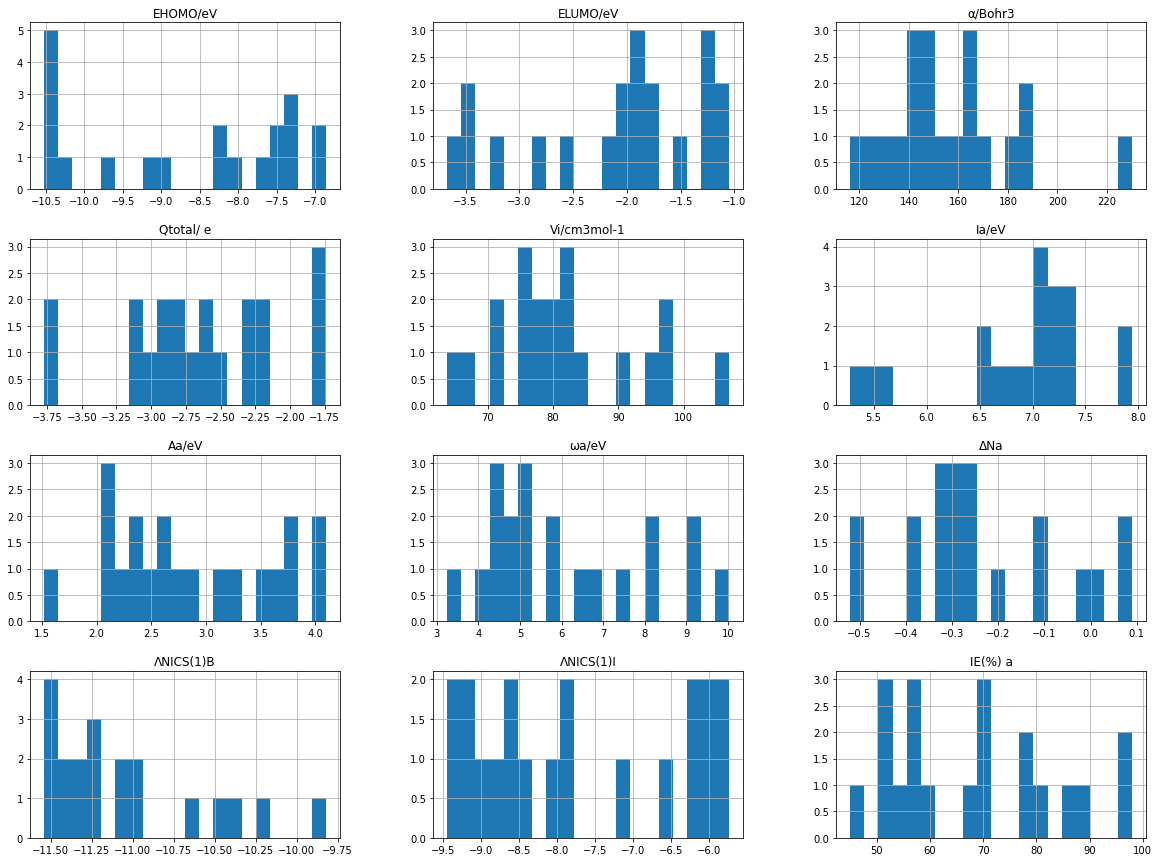

In [6]:
# Histogram sebelum ditambah sampel virtual
# =========================================
data_XY=data[['EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I', 'IE(%) a']]
%matplotlib inline
import matplotlib.pyplot as plt
data_XY.hist(bins=20, figsize=(20,15))
plt.show()

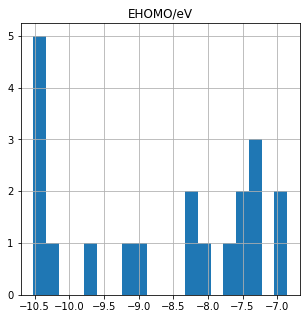

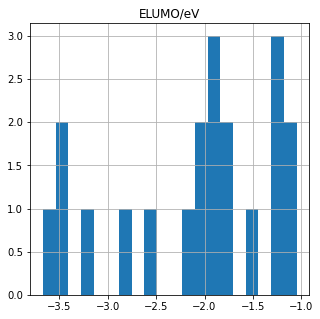

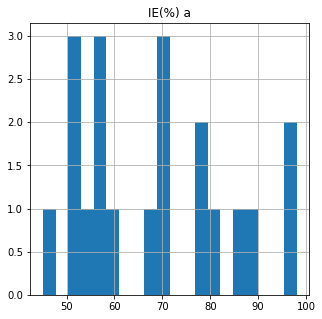

In [7]:
# Histogram sebelum ditambah sampel virtual
# =========================================
#data_XY=data[['EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
#       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I', 'IE(%) a']]

%matplotlib inline
import matplotlib.pyplot as plt

data[['EHOMO/eV']].hist(bins=20, figsize=(5,5))
data[['ELUMO/eV']].hist(bins=20, figsize=(5,5))
data[['IE(%) a']].hist(bins=20, figsize=(5,5))

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'LUMO Distribution')

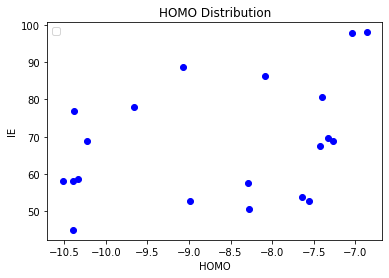

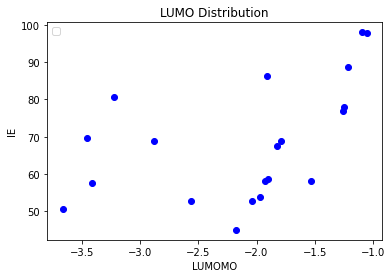

In [8]:
HOMO = data['EHOMO/eV'].values
LUMO = data['ELUMO/eV'].values
IE   = data['IE(%) a'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMOMO")
plt.title('LUMO Distribution')


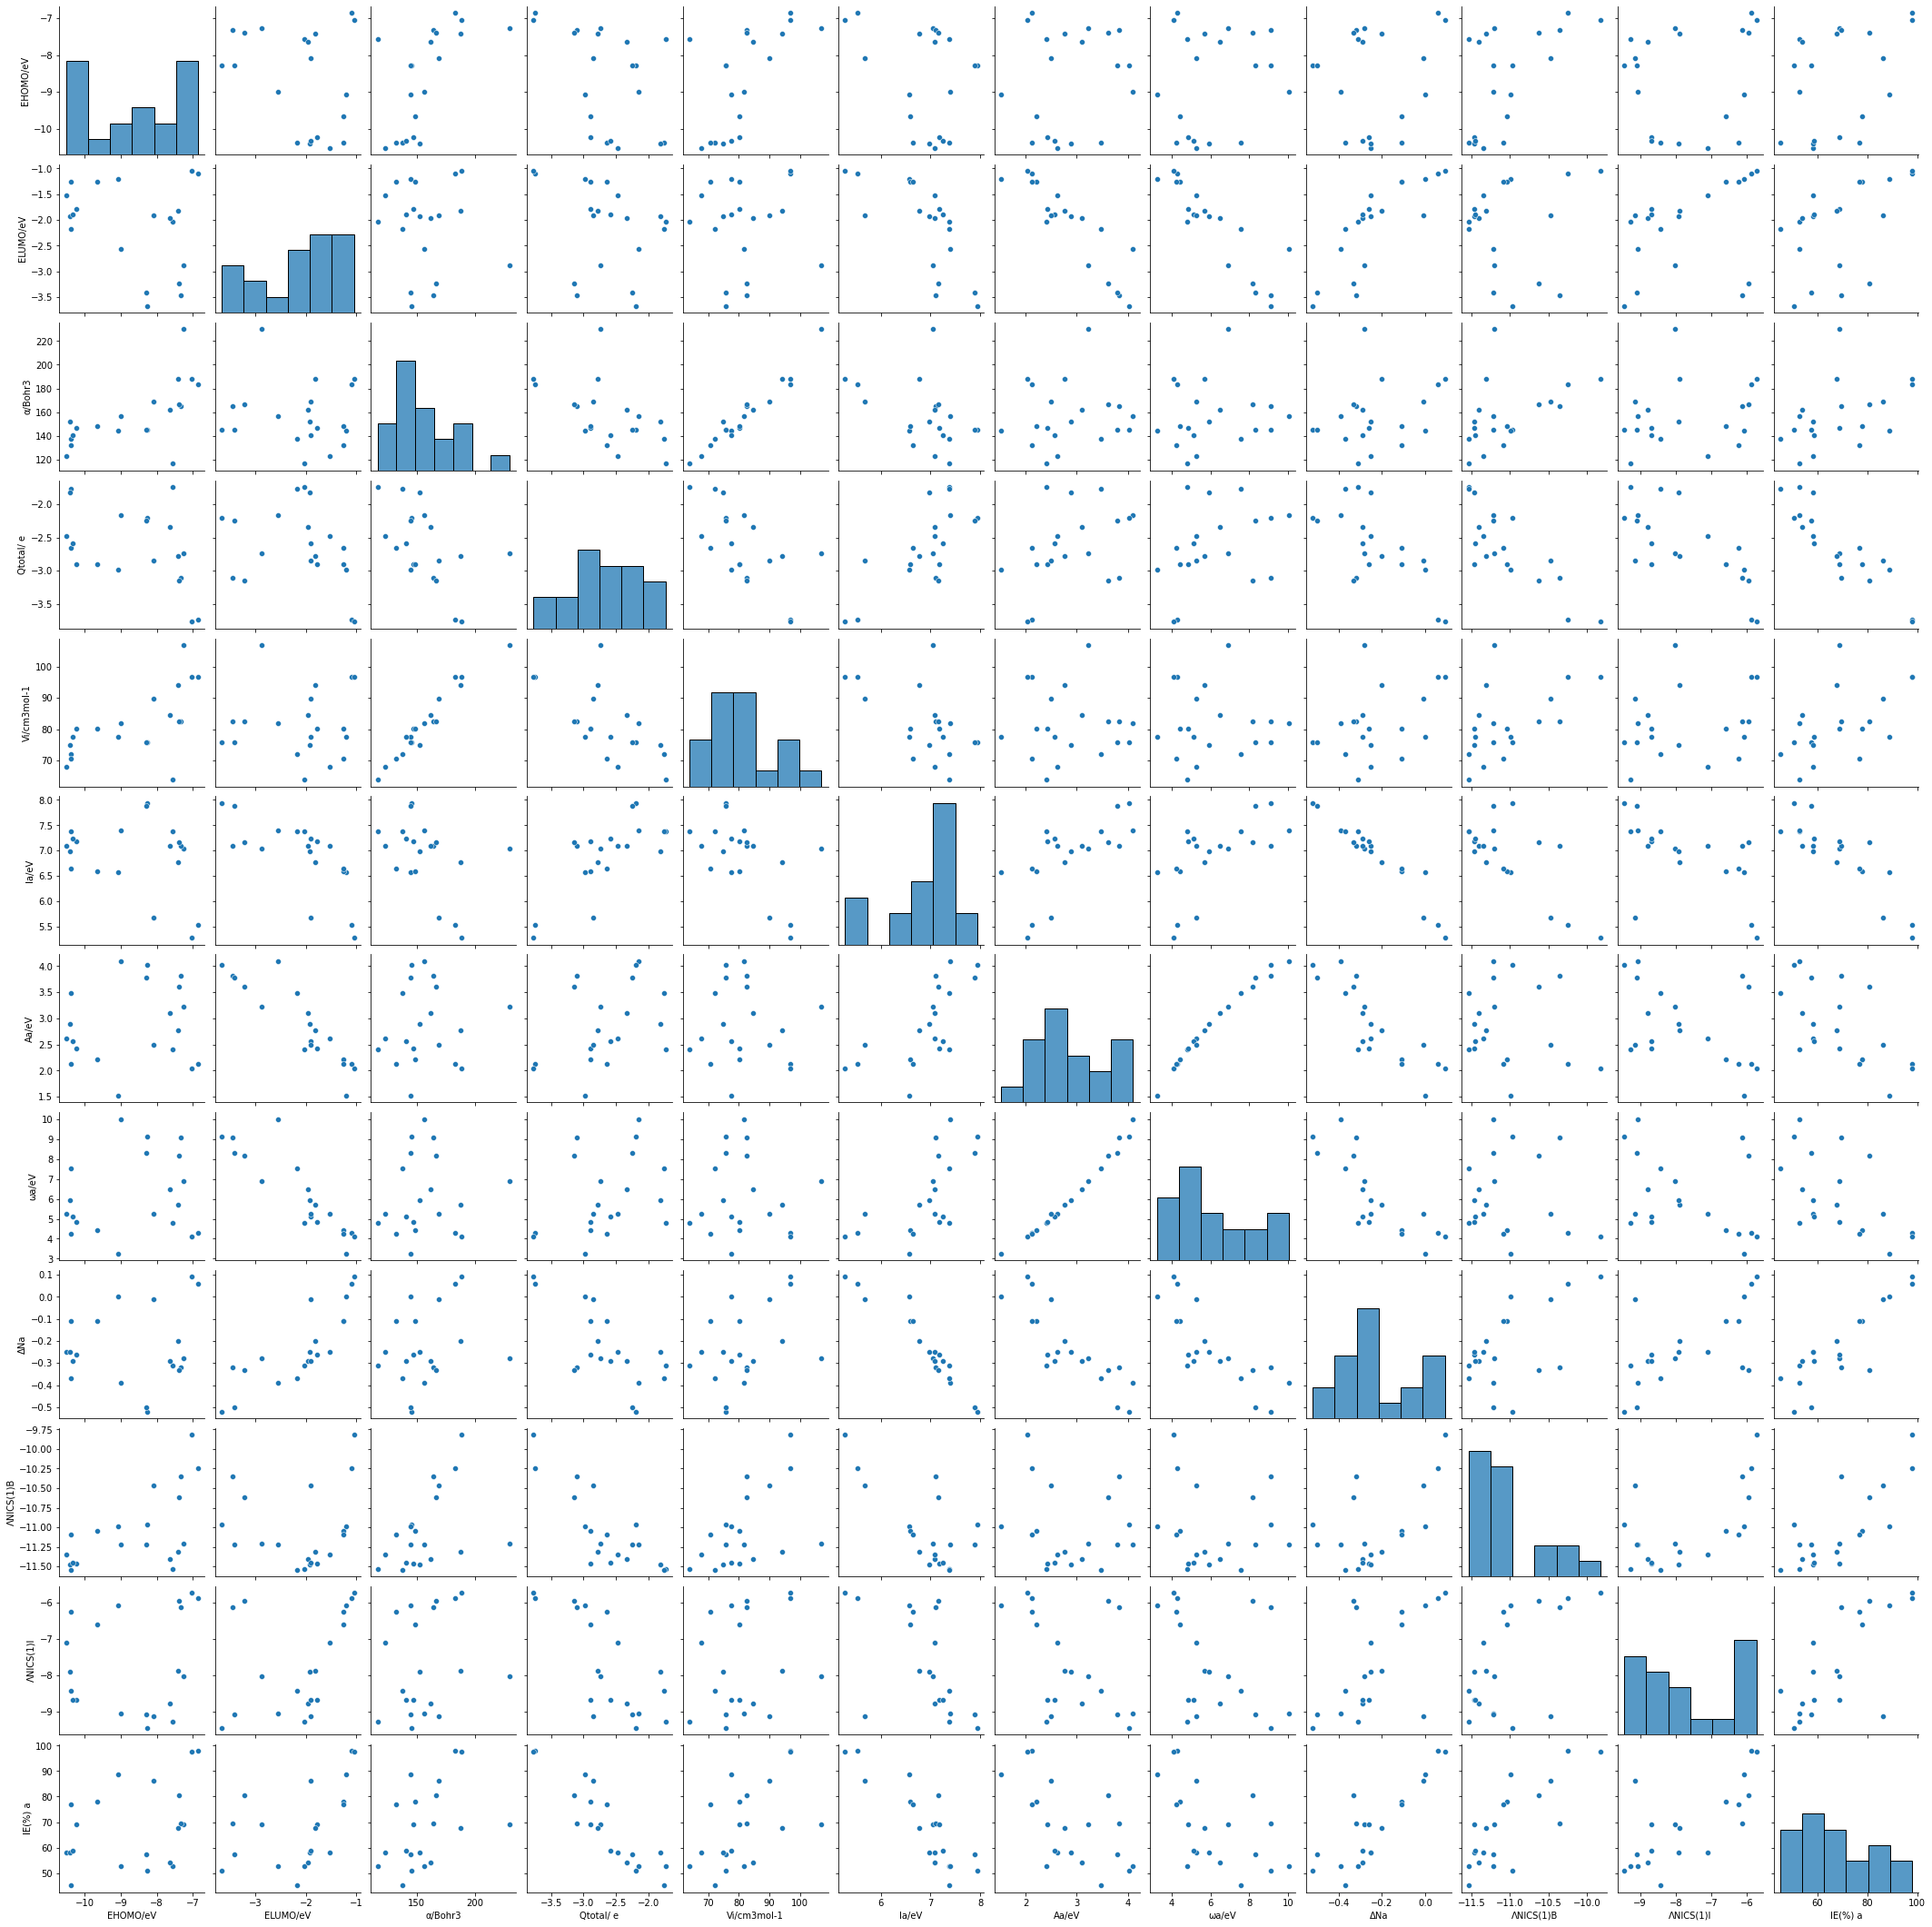

In [9]:
sns.pairplot(data_XY)

In [9]:
data_XY=data[['EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I', 'IE(%) a']]

data_X=data[['EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I']]
data_Y=data['IE(%) a']


In [11]:
# Korelasi deskriptor terhadap target IE: sebelum ditambah sampel virtual
# ============================================================
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr  # naik atau turun monoton (non linier)
from scipy.stats import kendalltau 
from scipy.stats import pearsonr   # naik atau turun linier

kolom_X = ['EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I']

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = data_X[kolom_X[i]]
    y = data_Y
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % np.round(p,3))
    else:
        print('Samples are correlated (reject H0) p=%.3f' % np.round(p,3))
    print()

EHOMO/eV :  0.386
Samples are uncorrelated (fail to reject H0) p=0.092

ELUMO/eV :  0.611
Samples are correlated (reject H0) p=0.004

α/Bohr3 :  0.472
Samples are correlated (reject H0) p=0.036

Qtotal/ e :  -0.923
Samples are correlated (reject H0) p=0.000

Vi/cm3mol-1 :  0.539
Samples are correlated (reject H0) p=0.014

Ia/eV :  -0.818
Samples are correlated (reject H0) p=0.000

Aa/eV :  -0.629
Samples are correlated (reject H0) p=0.003

ωa/eV :  -0.605
Samples are correlated (reject H0) p=0.005

ΔNa :  0.775
Samples are correlated (reject H0) p=0.000

ΛNICS(1)B :  0.725
Samples are correlated (reject H0) p=0.000

ΛNICS(1)I :  0.735
Samples are correlated (reject H0) p=0.000



In [15]:
# ============================================
# Training and testing the Model  
# ============================================
X_train = data_X[0:16].values
Y_train = data_Y[0:16].values

X_test = data_X[16:]
Y_test = data_Y[16:]

Target   = data['IE(%) a'].values 
Y_Discus = data['IE_Discus'].values
Y_QSAR = data['IE_QSAR'].values
X = data_X.values
Y = data_Y.values

# Initialise the Scaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)  # X_normal

# K-Fold tanpa fungsi polinomial
# ==============================
from sklearn.model_selection import KFold

# Leave-One -Out adalah  jumlah fold sama dengan jumlah data training
kfold = KFold(n_splits=16, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions


rmsec=[]
rmsecv=[]
rmse  =[]
r1=[]
for train_ix, test_ix in kfold.split(X_train, Y_train):
    # select rows
    x_train1, x_val = X_train[train_ix], X_train[test_ix]
    y_train1, y_val = Y_train[train_ix], Y_train[test_ix]

    #=======================================    
    model = KNeighborsRegressor()

    # ======= ANN ==========================
    
        
    model.fit(x_train1, y_train1)
    y_pred_train  = model.predict(x_train1)
    y_pred_test   = model.predict(X_test)
    y_pred_val    = model.predict(x_val)
    
    temp_rmsec    = np.sqrt(mean_squared_error(y_train1, y_pred_train))
    temp_rmsecv   = np.sqrt(mean_squared_error(y_val, y_pred_val))
    temp_rmse     = np.sqrt(mean_squared_error(Y_test,y_pred_test))
    temp_r1       = r2_score(Y_test,y_pred_test)
    #=======================================================================================
    

    rmsec.append(temp_rmsec)
    rmsecv.append(temp_rmsecv)
    rmse.append(temp_rmse)
    r1.append(temp_r1)

#=======================================


# RMSE training
print('RMSECV',str(model), ':',np.round(np.mean(rmsecv),3))
#print('R2_CV     :',np.round(np.mean(r1),3))
print('RMSE_test',str(model),'',np.round(np.mean(rmse),3))
print('RMSE_test SVM_Li 2015 : 6.79')
print('RMSE_test SVM_Liu 2019: 4.45')
print('')
print()

print('R^2 ',str(model),' :',np.round(np.mean(r2_1),3))
print('R^2 SVM_Li 2015: R = 0.96   (in Ref,  R2: 0.92)')
print('R^2 SVM_Liu 2019 R = 0.9589 (in Ref,  R2: 0.92)')
print()



RMSECV KNeighborsRegressor() : 14.388
RMSE_test KNeighborsRegressor()  12.89
RMSE_test SVM_Li 2015 : 6.79
RMSE_test SVM_Liu 2019: 4.45


R^2  KNeighborsRegressor()  : -0.27
R^2 SVM_Li 2015: R = 0.96   (in Ref,  R2: 0.92)
R^2 SVM_Liu 2019 R = 0.9589 (in Ref,  R2: 0.92)



In [25]:
# ======================================================
# HCVSG (Hamiltonian Circuit Virtual Samples Generation)
# ======================================================
# No 1 s/d 16   digunakan sbg training;   17 s/d 20 sebagai testing  (Tanpa split)
X_train = data_X[0:16]
Y_train = data_Y[0:16]

X_test = data_X[16:]
Y_test = data_Y[16:]

X_ALL = data_X.values
Y_ALL = data_Y.values


X = X_train.values
Y = Y_train.values



In [26]:
def Xmin_Xmax(X):
    X_min=[]
    X_max=[]
    for i in range(len(X[1,:])):   # baris ke-1, semua kolom \n",
        X_min=X_min + [np.min(X[0:, i:i+1])]  #mengambil nilai min pd setiap kolom
        X_max=X_max + [np.max(X[0:, i:i+1])]  #mengambil nilai max pd setiap kolom
    
    X_min=np.array(X_min)
    X_max=np.array(X_max)
    return X_min, X_max
    
def Gabung_X_Xmin_Xmax(X, X_min, X_max):
    X = np.vstack((X,X_min))
    X = np.vstack((X,X_max))
    return X
    
def Normalisasi(X):
    scaler = MinMaxScaler()
    normal = scaler.fit_transform(X)
    return normal

def Denormalisasi(X_normal,X_min, X_max):
    X = np.vstack((X_min, X_max))
    scaler = MinMaxScaler()
    scaler.fit_transform(X)
    X_inv = scaler.inverse_transform(X_normal)
    return X_inv

def Split_X_Xmin_Xmax(X):
    X=X[0:-2,:]
    return X
    
def preprosesing(X, X_min, X_max):
    Gabung = Gabung_X_Xmin_Xmax(X, X_min, X_max)
    Normal = Normalisasi(Gabung)
    Split_normal = Split_X_Xmin_Xmax(Normal)
    return Split_normal



In [27]:
X_min, X_max = Xmin_Xmax(X_ALL)  #mencari nilai min dan max tiap-tiap kolom

In [28]:
regressor_Non_VSG = KNeighborsRegressor(1)
regressor_VSG = KNeighborsRegressor(1)

In [42]:
# ==========================  Searching of HCVSG ==========================
# Number of samples = 20,  16 training and 4 tests (already determined/not random)
# 16 divided: 12 train and 4 test

J_sampel = [12]   # number of training samples    
Batas    = 4   # Theta

Seed_angka = 1 + np.arange(1000)

for Jumlah_sampel in J_sampel:
    

    # ================================= Pengambilan sampel Training ====================================================\n",
    for Random_Data_Split in Seed_angka:
        
        # 1 Dtrain > 9 jalur
        Rand_D_Split  = []
        Rand_VSGP     = []
        Kinerja1 = []
        Kinerja2 = []
        Counter  = 0
        
        Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)
        x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split)
        
        x_t   = X       # training data have been predetermined
        y_t   = Y       
        x_uji = X_test  # testing data have been predetermined
        y_uji = Y_test        
        
        x_tr   = preprosesing(x_t, X_min, X_max)
        x_test = preprosesing(x_uji, X_min, X_max)
        y_tr   = y_t.reshape(-1,1)
        y_test = y_uji
        
        # ==========  Predict Non VSG ===================================\n",
        regressor_Non_VSG.fit(x_tr, y_tr) #training the algorithm\n",
        y_pred_Non_VSG = regressor_Non_VSG.predict(x_test)
        # =======================================================\n",
        
        
        No_bil_acak = 1+ np.arange(500) 
        # =================================  Pengacakan posisi Array ==========================\n",
        for Random_VSGP in No_bil_acak:
            
            x_latih, y_latih = shuffle(x_tr, y_tr, random_state= Random_VSGP)   # Posisi Array diacak\n",          
            y_latih  = y_latih.reshape(-1,1)
            #agar posisi terakhir terhubung dg posisi awal\n",
            x_latih = np.vstack(([x_latih,x_latih[0]]))         
            y_latih = np.vstack(([y_latih,y_latih[0]]))
            
            Juml_fitur=len(X[0])      
            X1= np.zeros(Juml_fitur);     
            Y1=[0];  
            

            # ==================== Awal VSG      ===================================\n",


            SISIPAN = 10  #2,3,4,5,6,7,8,9,10,15,20]#,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
            
            for i in range (len(x_latih)-1):
                
                for j in range(SISIPAN):             
                    t=(j)/(SISIPAN)
                    temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
                    temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])
                    #=======================================================================\n",

                    X1=np.vstack((X1,temp_x))  
                    Y1=np.vstack((Y1,temp_y)) 

                # ===============================================================\n",
            #===for i in range (len(x_latih)==============================\n",
            
            
            X1=X1[1:] #menghilangkan inisialisasi X[0]
            Y1=Y1[1:] #menghilangkan inisialisasi Y[0]
        
            # ============== Predict VSG =========================\n",

            regressor_VSG.fit(X1, Y1) #training the algorithm\n",
            y_pred_VSG = regressor_VSG.predict(x_test)
            # ====================================================\n",
            

            # ========================   RMSE ================================================================   \n",
            temp1 = np.sqrt(mean_squared_error(y_test,y_pred_Non_VSG))   # RMSE\n",
            temp2 = np.sqrt(mean_squared_error(y_test,y_pred_VSG))       # RMSE\n",
            # =================================================================================================\n",
            

            if (temp2 < temp1) and (temp2 < Batas):  #menggunakan Batas
                Counter = Counter + 1
                Rand_D_Split.append(Random_Data_Split)
                Rand_VSGP.append(Random_VSGP)
                Kinerja1.append(np.round(temp1,3) )
                Kinerja2.append(np.round(temp2,3) )
                print('HCVSG: ',Counter)
                print('Random_Data_Split: ',Random_Data_Split)
                print('Random_HCVSG: ',Random_VSGP)
                print('RMSE of KNN: ',np.round(np.mean(temp1),3))
                print('RMSE of KNN + VSG : ',np.round(np.mean(temp2),3))
                print()
            if Counter > 5: break  # 1 Dtrain ada 10 jalur
                
            #=======================================
        # ======================= FOR Random VSGP =========================================    
        if Counter > 5: break
        
    # ========================== FOR Random Split =========================================

# ========================================================================================\n",
print('Method: ', str(regressor_Non_VSG))
print('============================================')
print('number of training samples = ',J_sampel[0])
print('Threshold Theta            = ',Batas)
print('Random_Data_Split          = ',Rand_D_Split)
print('Random_HCVSG               = ',Rand_VSGP)
print('RMSE of KNN                = ',np.round(np.mean(Kinerja1),3))
print('RMSE of KNN+VSG            = ',np.round(np.mean(Kinerja2),3))
print()



HCVSG:  1
Random_Data_Split:  1
Random_HCVSG:  73
RMSE of KNN:  12.484
RMSE of KNN + VSG :  3.564

HCVSG:  2
Random_Data_Split:  1
Random_HCVSG:  118
RMSE of KNN:  12.484
RMSE of KNN + VSG :  3.945

HCVSG:  3
Random_Data_Split:  1
Random_HCVSG:  246
RMSE of KNN:  12.484
RMSE of KNN + VSG :  3.564

HCVSG:  4
Random_Data_Split:  1
Random_HCVSG:  271
RMSE of KNN:  12.484
RMSE of KNN + VSG :  3.587

HCVSG:  5
Random_Data_Split:  1
Random_HCVSG:  346
RMSE of KNN:  12.484
RMSE of KNN + VSG :  3.978

HCVSG:  6
Random_Data_Split:  1
Random_HCVSG:  452
RMSE of KNN:  12.484
RMSE of KNN + VSG :  3.978

Method:  KNeighborsRegressor(n_neighbors=1)
number of training samples =  12
Threshold Theta            =  4
Random_Data_Split          =  [1, 1, 1, 1, 1, 1]
Random_HCVSG               =  [73, 118, 246, 271, 346, 452]
RMSE of KNN                =  12.484
RMSE of KNN+VSG            =  3.769



In [ ]:
'''
Method:  KNeighborsRegressor(n_neighbors=1)
============================================
number of training samples =  12
Threshold Theta            =  4
Random_Data_Split          =  [1, 1, 1, 1, 1, 1]
Random_HCVSG               =  [73, 118, 246, 271, 346, 452]
RMSE of KNN                =  12.484
RMSE of KNN+VSG            =  3.769
'''

### A pair of Random_Data_Split and Random_HCVSG is called HCVSG, used for generate virtual samples

In [47]:
# Training 
# ==========================
X_train = data_X[0:16]
Y_train = data_Y[0:16]
X_test  = data_X[16:]
Y_test  = data_Y[16:]
X_ALL   = data_X.values
Y_ALL   = data_Y.values

X = X_train.values
Y = Y_train.values




X_normal = preprosesing(X, X_min, X_max)

Juml_fitur=len(X[0])      
X1= np.zeros(Juml_fitur);     
Y1=[0];
rmse=[] #untuk pelatihan
R2  =[] #untuk pelatihan



# For predetermined test data
Random_Data_Split          =  [1, 1, 1, 1, 1, 1]
Random_HCVSG               =  [73, 118, 246, 271, 346, 452]

Jumlah_sampel = 12
Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)

for k in range(len(Random_HCVSG)):
    x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split[k]) #versi lama
    
    x_t   = X
    y_t   = Y
    x_uji = X_test
    y_uji = Y_test 
    
    x_tr   = preprosesing(x_t, X_min, X_max)
    x_test = preprosesing(x_uji, X_min, X_max)
    y_tr=y_t.reshape(-1,1)
    y_test=y_uji


# =================================  Pengacakan posisi Array ==========================

                           
    x_, y_ = shuffle(x_tr, y_tr, random_state= Random_HCVSG[k])   # Posisi Array diacak
         
    y_latih  = y_.reshape(-1,1)
    x_latih  = x_
    #agar posisi terakhir terhubung dg posisi awal
    x_latih = np.vstack(([x_latih,x_latih[0]]))         
    y_latih = np.vstack(([y_latih,y_latih[0]]))
    
    
    # ==================== Awal VSG      ===================================
    XA= np.zeros(Juml_fitur);   #untuk pelatihan  
    YA=[0];                     #untuk pelatihan
    
    SISIPAN = 10
    for i in range (len(x_latih)-1):
        y_alfa = y_latih[i] + alfa*(y_latih[i+1] - y_latih[i])
        for j in range(SISIPAN):             
            t=(j+1)/(SISIPAN+1)                      
            temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
                       
            if alfa == 0.5:
                temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])
                
            else:
                temp_y = (1-t)**2*y_latih[i] + 2*(1-t)*t*y_alfa + t**2*y_latih[i+1]              
                #=======================================================================
                        
            X1=np.vstack((X1,temp_x))  #simpan seluruh vs
            Y1=np.vstack((Y1,temp_y))  #simpan seluruh vs
            
            XA=np.vstack((XA,temp_x))  #simpan untuk pelatihan
            YA=np.vstack((YA,temp_y))  #simpan untuk pelatihan

        # ===============================================================
    # ===================================================================
    
    
    #=== Untuk Data Pelatihan =================
    XA=XA[1:] #menghilangkan inisialisasi X[0]
    YA=YA[1:] #menghilangkan inisialisasi Y[0]
    XA1=np.vstack((XA,x_tr))  # sampel virtual digabung dengan data training
    YA1=np.vstack((YA,y_tr))  # sampel virtual digabung dengan data training
    
    model = KNeighborsRegressor(1)

    model.fit(XA1,YA1)
    y_pred=model.predict(x_test)
    temp1 = np.sqrt(mean_squared_error(y_test,y_pred))
    temp2 = r2_score(y_test,y_pred)
    rmse.append(temp1)
    R2.append(temp2)
    #============================================================


X1=X1[1:] #menghilangkan inisialisasi X[0]
Y1=Y1[1:] #menghilangkan inisialisasi Y[0]

X1=np.vstack((X1,x_tr))  # sampel virtual digabung dengan data training
Y1=np.vstack((Y1,y_tr))  # sampel virtual digabung dengan data training


rmse_cv = np.round(np.mean(rmse),3)  
R2_cv   = np.round(np.mean(R2),3)
print('RMSECV KNN+VSG:',rmse_cv)
#print('R-Squared     :',R2_cv)

RMSECV KNN+VSG: 4.455


### Model testing

In [50]:
model = KNeighborsRegressor()

model.fit(X1, Y1)
# ==================================================
model_paper = 'SVM'

Target   = data['IE(%) a'].values 
Y_Discus = data['IE_Discus'].values
Y_QSAR = data['IE_QSAR'].values


X_train = data_X[0:16]
Y_train = data_Y[0:16]
X_test  = data_X[16:]
Y_test  = data_Y[16:]
X_ALL   = data_X.values
Y_ALL   = data_Y.values



X_train = X_train.values
Y_train = Y_train.values
X_test  = X_test.values
Y_test  = Y_test.values

X_min, X_max     = Xmin_Xmax(X_train)
X_normal_train   = preprosesing(X_train, X_min, X_max)
X_normal_test    = preprosesing(X_test, X_min, X_max)

# %RMSE_test
# ====================================================================================================
#x_train, x_test, y_train, y_test = train_test_split(X_normal, Y, test_size=3, random_state=1)
y_pred_VSG_train = model.predict(X_normal_train)
y_pred_VSG_test  = model.predict(X_normal_test)
RMSE_test        = np.sqrt(mean_squared_error(Y_test,y_pred_VSG_test))       # RMSE\n",
r2_test          = r2_score(Y_test,y_pred_VSG_test)

# %RMSE seluruh Data
# ====================================================================================================
X_normal    = preprosesing(X_ALL, X_min, X_max)
y_pred_VSG  = np.round(model.predict(X_normal).flatten(),2)


r2_1     = r2_score(Target,y_pred_VSG)
r2_2     = r2_score(Target,Y_Discus)
r2_3     = r2_score(Target,Y_QSAR)

rmse1 = np.sqrt(mean_squared_error(Target,y_pred_VSG))
rmse2 = np.sqrt(mean_squared_error(Target,Y_Discus))
rmse3 = np.sqrt(mean_squared_error(Target,Y_QSAR))


print('============= Result of Prediction ================')
print('RMSE_test', str(model),'+VSG :', np.round(RMSE_test,3))
print('RMSE_test SVM_Li 2015 : 6.79')
print('RMSE_test SVM_Liu 2019: 4.45')
print()
print()
#print('R^2 KNN+VSG                                     :', np.round(r2_test,3))

#print('============= Prediksi VSG ALL Data =============')
#print('RMSE KNN+VSG     : ',np.round(rmse1,3))
print('R^2  KNN+VSG     :', np.round(r2_1,3))
print('R^2 SVM_Li 2015 : R = 0.96   (data di paper) R^2: 0.92')
print('R^2 SVM_Liu 2019: R = 0.9589 (data di paper) R^2: 0.92')
print()

#print('RMSE SVM Discus : ',np.round(rmse2,3))
#print('R^2  SVM Discus :', np.round(r2_2,3))
print()
#print('RMSE SVM QSAR   : ',np.round(rmse3,3))
#print('R^2  SVM QSAR   :', np.round(r2_3,3))
print()








============= Result of Prediction ================
RMSE_test KNeighborsRegressor() +VSG : 4.152
RMSE_test SVM_Li 2015 : 6.79
RMSE_test SVM_Liu 2019: 4.45


R^2  KNN+VSG     : 0.984
R^2 SVM_Li 2015 : R = 0.96   (data di paper) R^2: 0.92
R^2 SVM_Liu 2019: R = 0.9589 (data di paper) R^2: 0.92





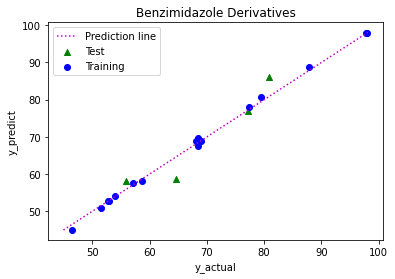

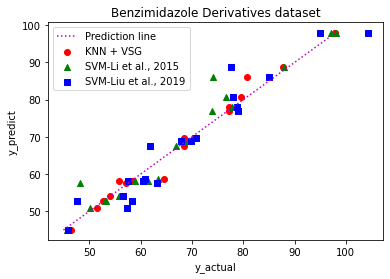

In [52]:
xline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))
yline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))

plt.figure()
plt.scatter(y_pred_VSG_test,Y_test,    c='g', marker = '^', label = "Test")
plt.scatter(y_pred_VSG_train,Y_train , c='b', label = "Training")
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_predict") 
judul = str(model)+'+ Virtual Samples'
plt.title('Benzimidazole Derivatives')
plt.show()

# Buat grafik VSG dan VSG utk seluruh data
plt.figure()
plt.scatter(y_pred_VSG,Target, c='r',  label = 'KNN + VSG')
plt.scatter(Y_Discus,Target,   c='g',  marker = '^',    label = 'SVM-Li et al., 2015')
plt.scatter(Y_QSAR,Target,     c='b',  marker = 's',    label = 'SVM-Liu et al., 2019')

plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_predict") 
judul = str(model)+'+ Virtual Samples'
plt.title('Benzimidazole Derivatives dataset')
plt.show()



### Histogram after adding virtual samples

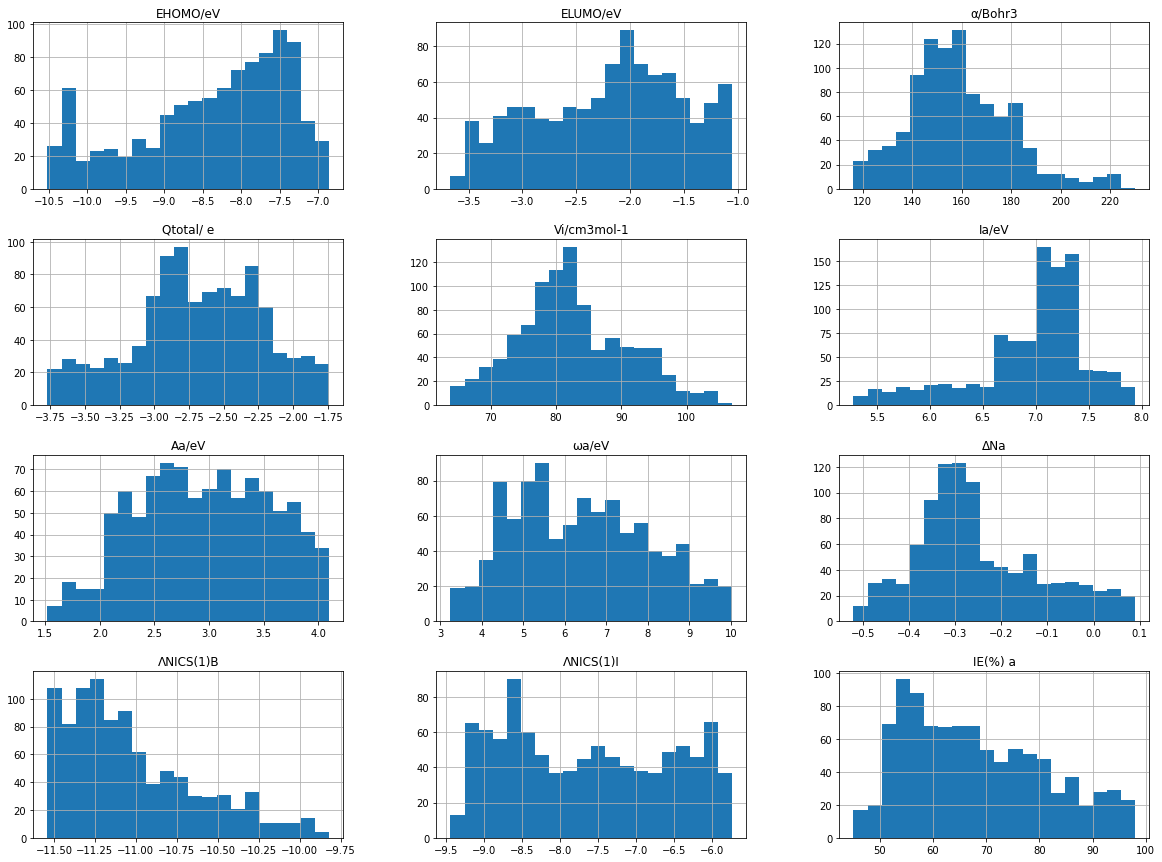

In [53]:
# Histogram setelah ditambah sampel virtual
import pandas as pd
kolom_XY = ['EHOMO/eV', 'ELUMO/eV', 'α/Bohr3', 'Qtotal/ e', 'Vi/cm3mol-1',
       'Ia/eV', 'Aa/eV', 'ωa/eV', 'ΔNa', 'ΛNICS(1)B', 'ΛNICS(1)I', 'IE(%) a']

# utk kebutuhan grafik, X1 hrs di invers supaya besarannya kembali seperti semula
X_inv=Denormalisasi(X1,X_min, X_max)
X_inv = np.round_(X_inv, decimals = 3)
Y_inv=np.round_(Y1, decimals = 3)
Data_VSG = np.hstack((X_inv,Y_inv))
Data_VSG_XY = pd.DataFrame(Data_VSG, columns=kolom_XY)
Data_VSG_XY.hist(bins=20, figsize=(20,15))
plt.show()


In [55]:
# Correlation between descriptors and targets (IE)
from scipy.stats import spearmanr  # naik atau turun monoton (non linier)

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = Data_VSG_XY[kolom_X[i]]
    y = Y1
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        print()
    else:        
        print('Samples are correlated (reject H0) p=%.3f' % p)
        print()


EHOMO/eV :  0.411
Samples are correlated (reject H0) p=0.000

ELUMO/eV :  0.479
Samples are correlated (reject H0) p=0.000

α/Bohr3 :  0.585
Samples are correlated (reject H0) p=0.000

Qtotal/ e :  -0.95
Samples are correlated (reject H0) p=0.000

Vi/cm3mol-1 :  0.629
Samples are correlated (reject H0) p=0.000

Ia/eV :  -0.857
Samples are correlated (reject H0) p=0.000

Aa/eV :  -0.6
Samples are correlated (reject H0) p=0.000

ωa/eV :  -0.567
Samples are correlated (reject H0) p=0.000

ΔNa :  0.809
Samples are correlated (reject H0) p=0.000

ΛNICS(1)B :  0.744
Samples are correlated (reject H0) p=0.000

ΛNICS(1)I :  0.871
Samples are correlated (reject H0) p=0.000



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'LUMO Distribution')

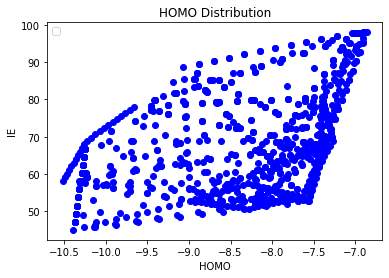

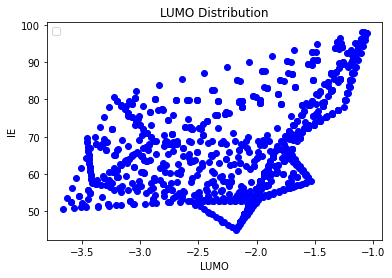

In [56]:
HOMO = Data_VSG_XY['EHOMO/eV'].values
LUMO = Data_VSG_XY['ELUMO/eV'].values
IE   = Data_VSG_XY['IE(%) a'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMO")
plt.title('LUMO Distribution')


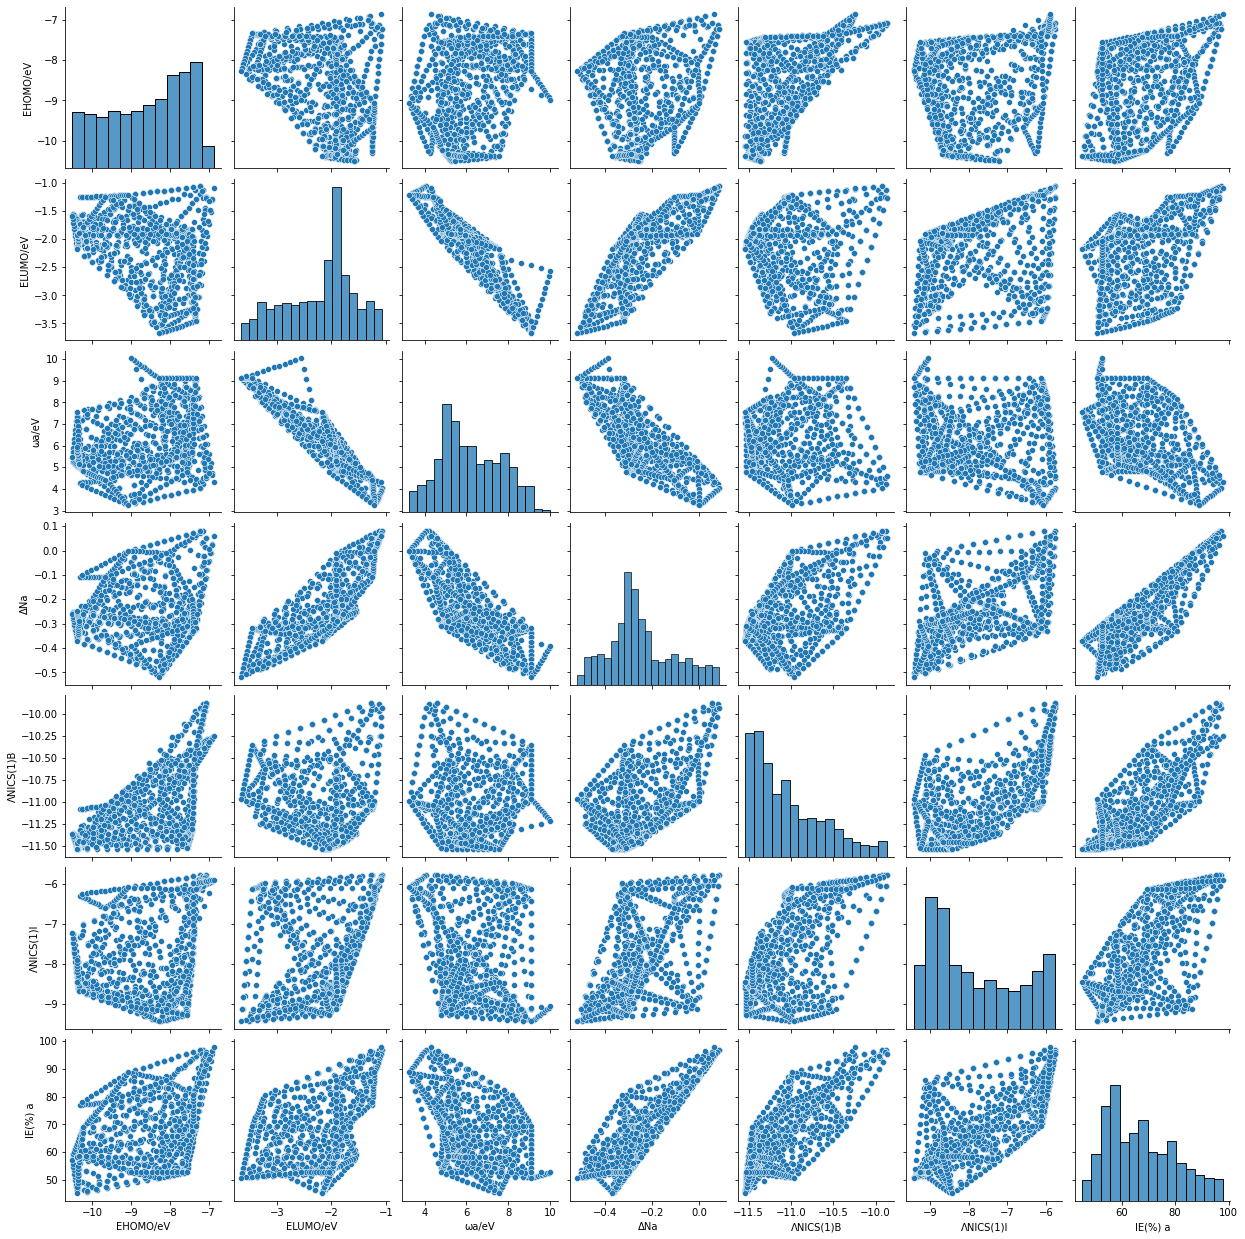

In [24]:
sns.pairplot(df4)